# Importing Libraries

In [26]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Data Analysis

In [27]:
#read data from file
df = pd.read_csv('data.csv')

In [28]:
#we only need the first 9 features
df.drop(df.columns[11:], axis=1, inplace=True)

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [30]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000


/home/swapnil/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


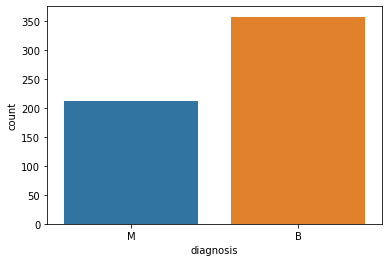

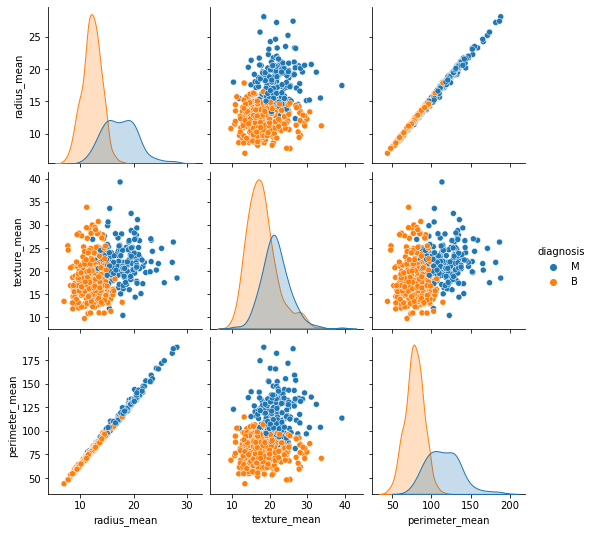

In [31]:
#Viewing some data graphically
df['diagnosis'].value_counts();
sb.countplot(df['diagnosis'],label='count')
sb.pairplot(df.iloc[:,1:5],hue='diagnosis')

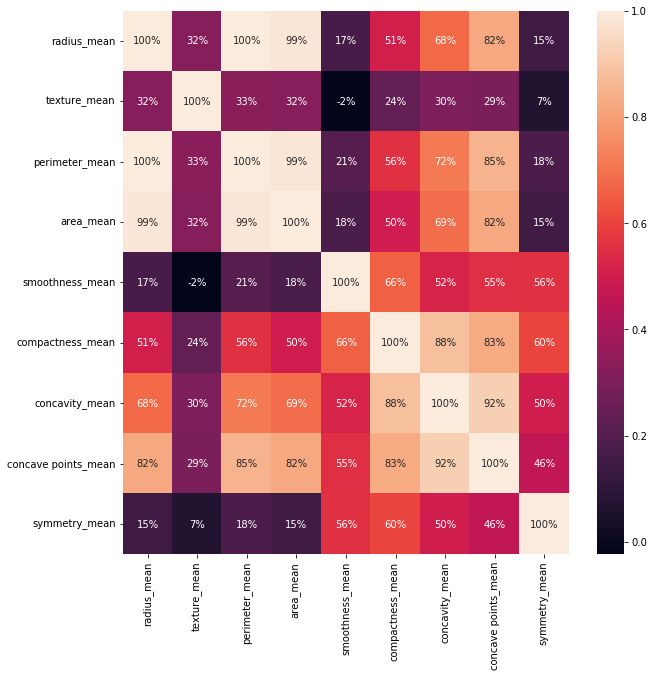

In [32]:
#Check correlation between features
df.iloc[:,1:].corr(); 
plt.figure(figsize=(10,10))
sb.heatmap(df.iloc[:,1:].corr(),annot=True,fmt='.0%')

## Data Pre-Processing

In [33]:
#convert M and B to 1 and 0 respectively 
from sklearn.preprocessing import LabelEncoder

labelEncodeY = LabelEncoder()
df.iloc[:,1]=labelEncodeY.fit_transform(df.iloc[:,1].values)

In [34]:
#Splitting Dataset into input features and output results
X = df.iloc[:,2:31].values 
Y = df.iloc[:,1].values 

In [35]:
#Splitting Dataset into training and testing
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=0)

In [36]:
'''
#Feature scaling -> running this will cause issues in the main file(model won't predict properly)

from sklearn.preprocessing import StandardScaler

Xtrain = StandardScaler().fit_transform(Xtrain)
Xtest = StandardScaler().fit_transform(Xtest)
'''

'\n#Feature scaling\nfrom sklearn.preprocessing import StandardScaler\n\nXtrain = StandardScaler().fit_transform(Xtrain)\nXtest = StandardScaler().fit_transform(Xtest)\n'

## Training Model

In [37]:
#Random Forest model works best compared to other models like Logistic Regression
def model(Xtrain,Ytrain):
    from sklearn.ensemble import RandomForestClassifier
    
    forestModel = RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
    forestModel.fit(Xtrain,Ytrain)
    
    return forestModel

In [38]:
trainedModel = model(Xtrain,Ytrain)

## Testing Model and its Results

In [39]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(Ytest,trainedModel.predict(Xtest)))

accuracy = accuracy_score(Ytest,trainedModel.predict(Xtest))
accuracyPercentage = accuracy*100 #accuracy is a demical value

print("Accuracy is {:.2f}%".format(accuracyPercentage))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.95      0.91      0.93        22

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57

Accuracy is 94.74%


## Saving Model

In [40]:
from joblib import dump

dump(trainedModel,"BCP_Model.joblib")

['BCP_Model.joblib']